In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Tb disease symptoms without id and datetime.csv")




In [25]:
df.describe()

,no,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.49000,0.517000,0.513000,0.507000,0.512000,0.497000,0.525000,0.501000,0.507000,0.474000,0.511000,0.488000,0.472000
std,288.819436,0.50015,0.499961,0.500081,0.500201,0.500106,0.500241,0.499624,0.500249,0.500201,0.499573,0.500129,0.500106,0.499465
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,750.250000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   name                                                       1000 non-null   object
 2   gender                                                     1000 non-null   object
 3   fever for two weeks                                        1000 non-null   int64 
 4   coughing blood                                             1000 non-null   int64 
 5   sputum mixed with blood                                    1000 non-null   int64 
 6   night sweats                                               1000 non-null   int64 
 7   chest pain                                                 1000 non-null   int64 
 8   back pain in certai

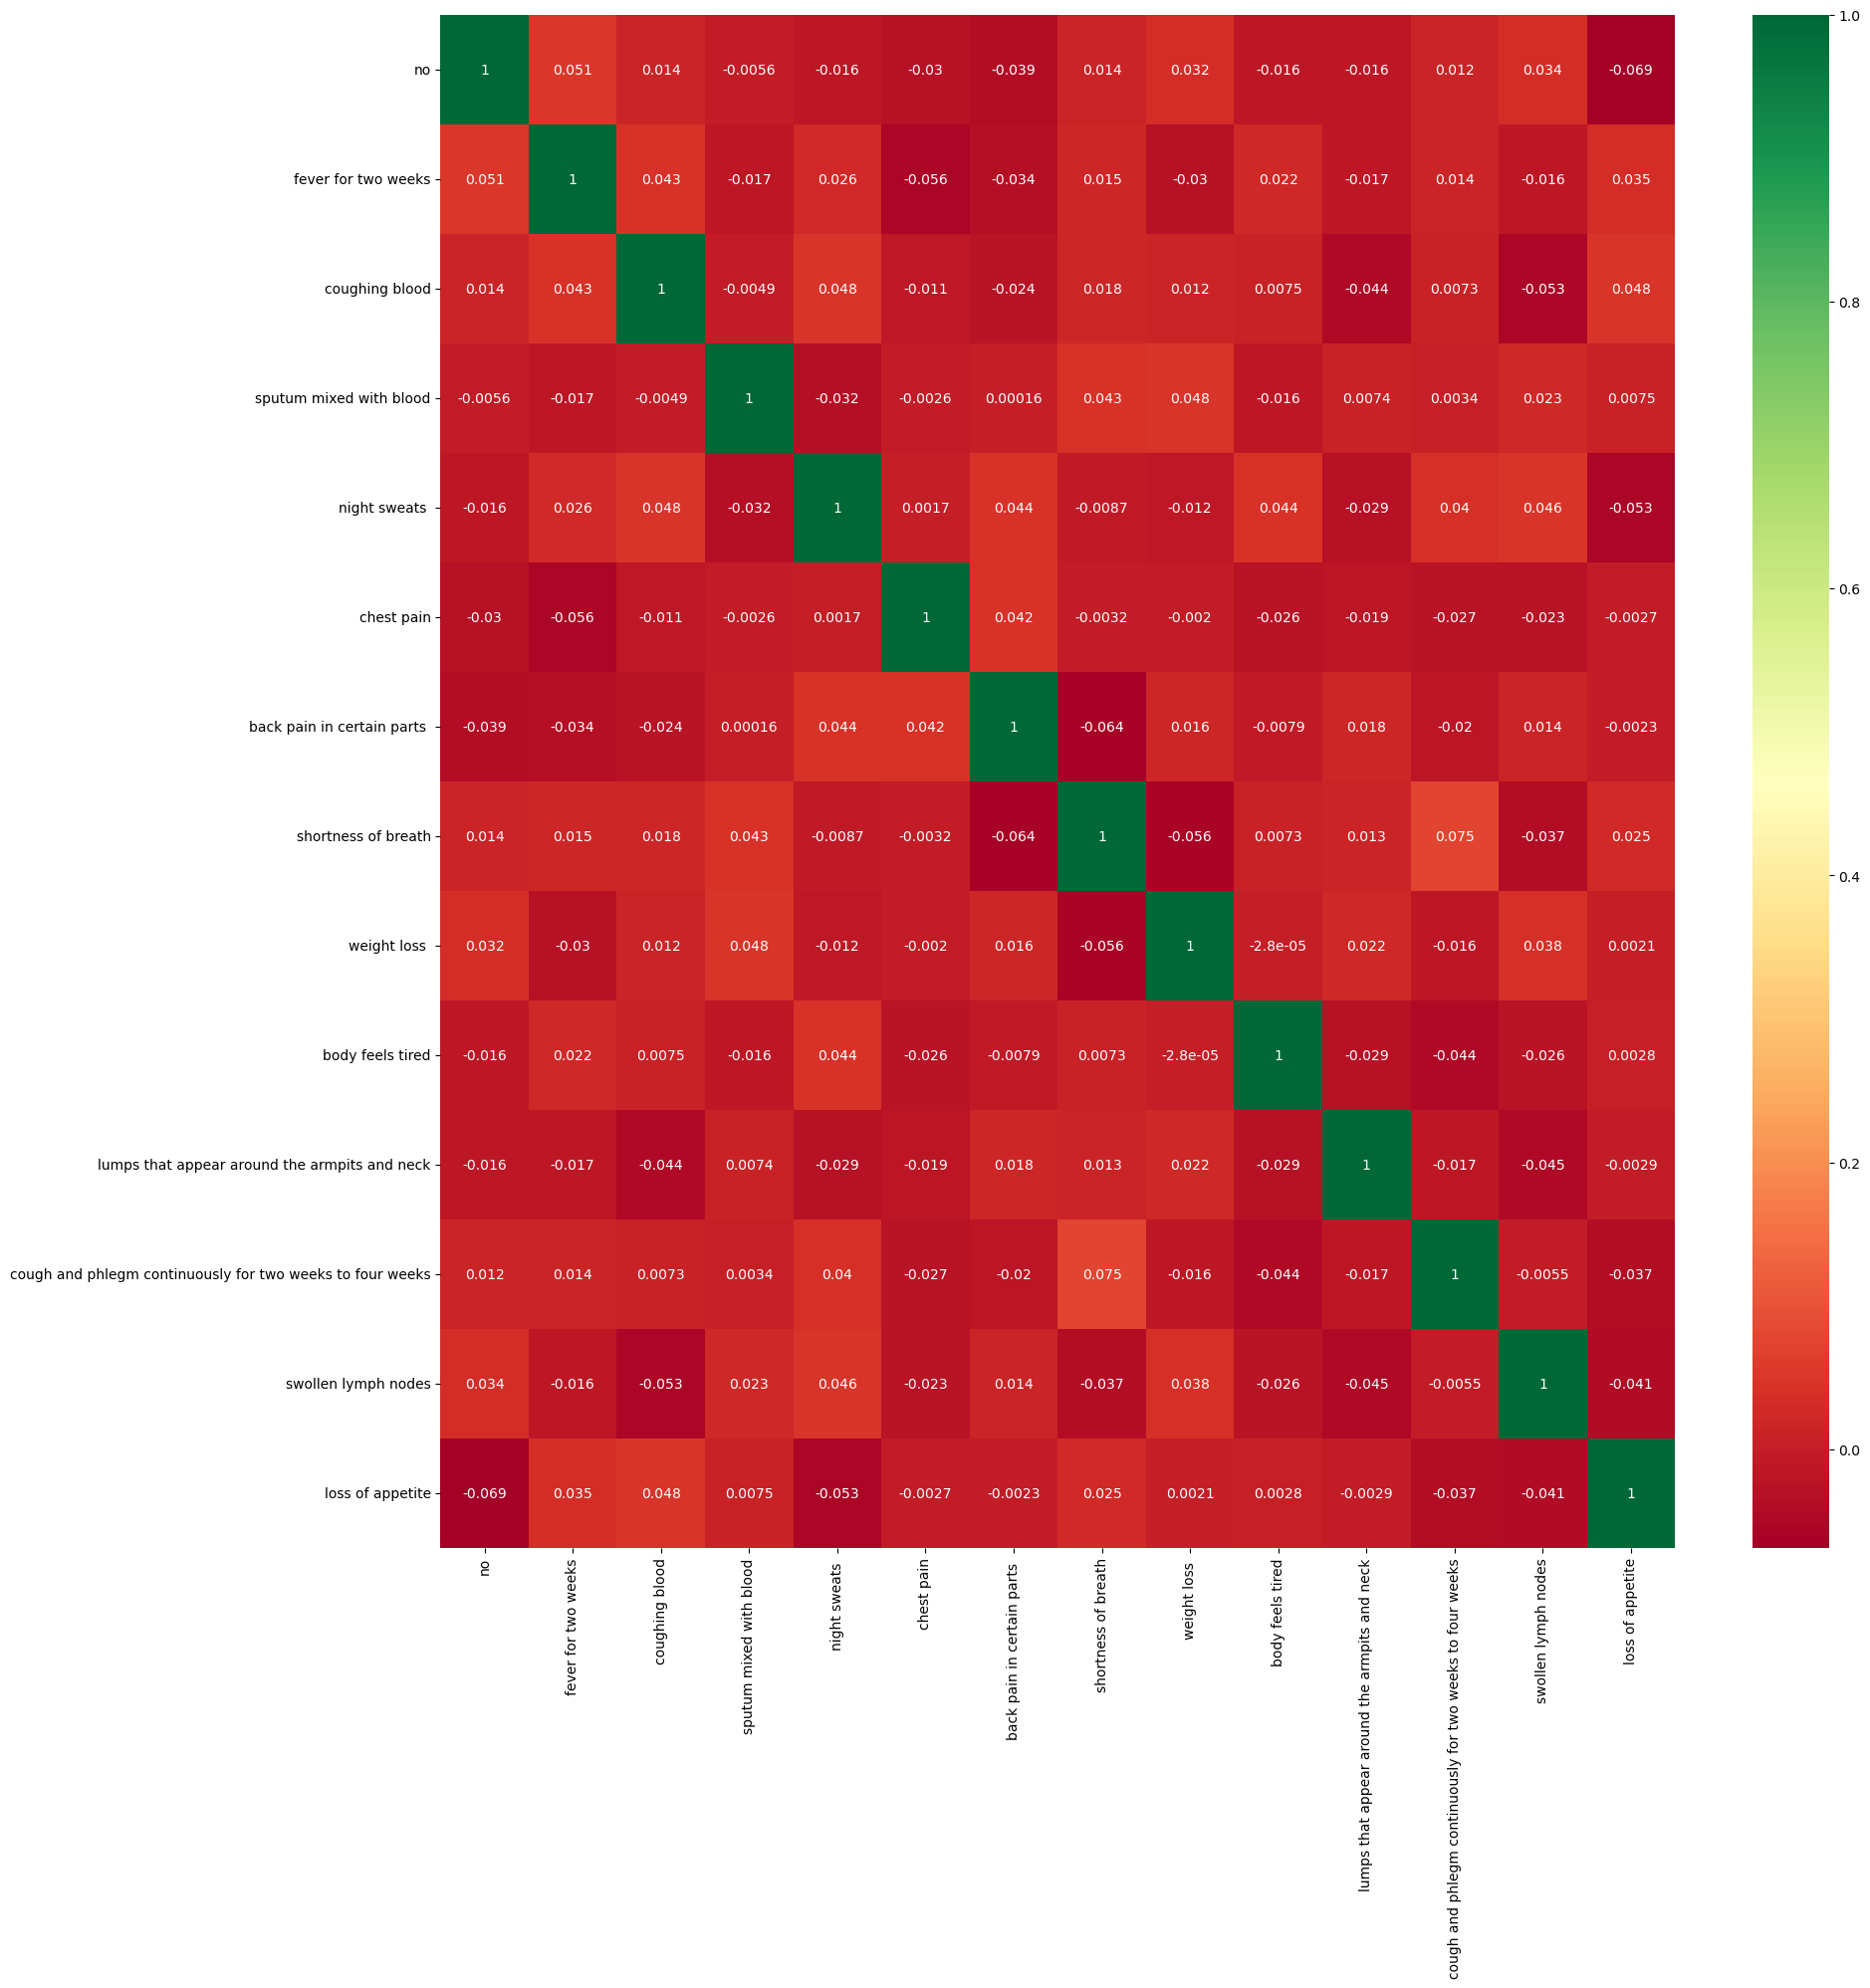

In [31]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.select_dtypes(include=['number']).corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'no'}>,
        <Axes: title={'center': 'fever for two weeks'}>,
        <Axes: title={'center': 'coughing blood'}>,
        <Axes: title={'center': 'sputum mixed with blood'}>],
       [<Axes: title={'center': 'night sweats '}>,
        <Axes: title={'center': 'chest pain'}>,
        <Axes: title={'center': 'back pain in certain parts '}>,
        <Axes: title={'center': 'shortness of breath'}>],
       [<Axes: title={'center': 'weight loss '}>,
        <Axes: title={'center': 'body feels tired'}>,
        <Axes: title={'center': 'lumps that appear around the armpits and neck'}>,
        <Axes: title={'center': 'cough and phlegm continuously for two weeks to four weeks'}>],
       [<Axes: title={'center': 'swollen lymph nodes'}>,
        <Axes: title={'center': 'loss of appetite'}>, <Axes: >, <Axes: >]],
      dtype=object)

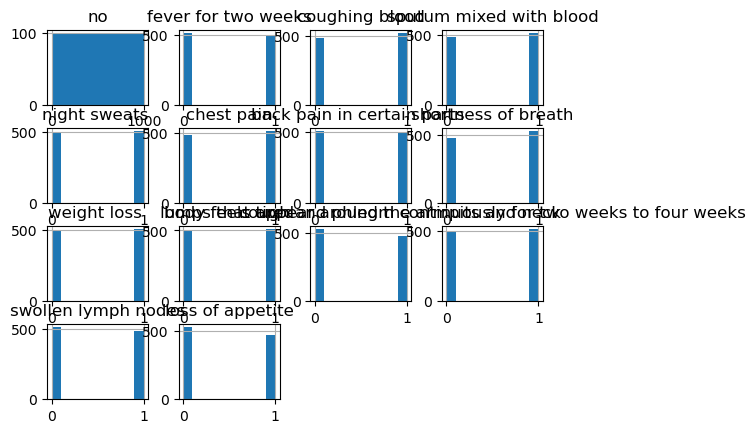

In [33]:
df.hist()

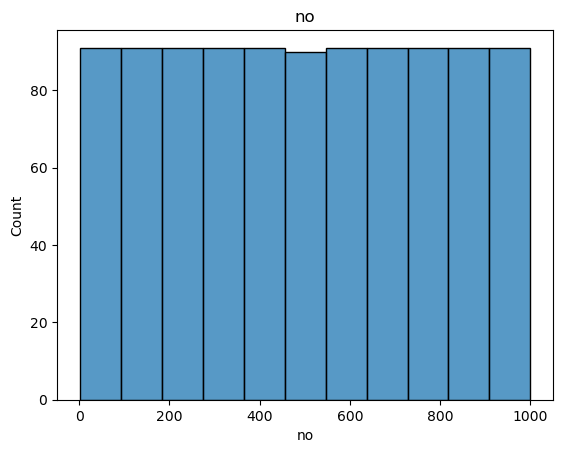

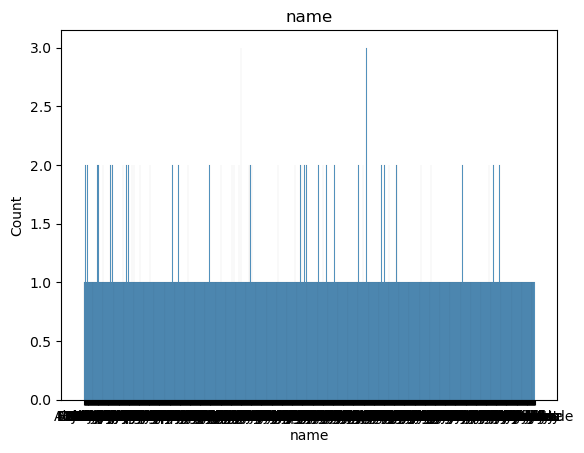

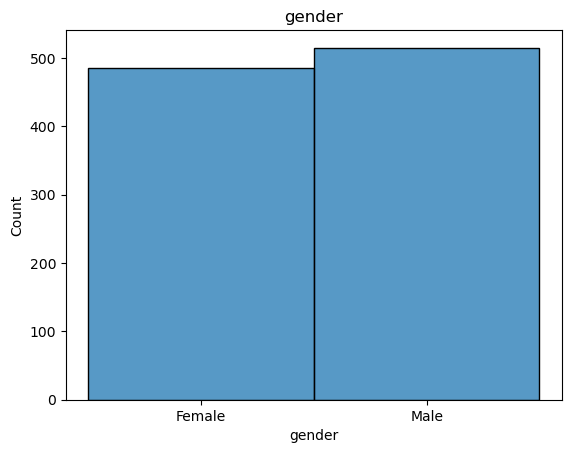

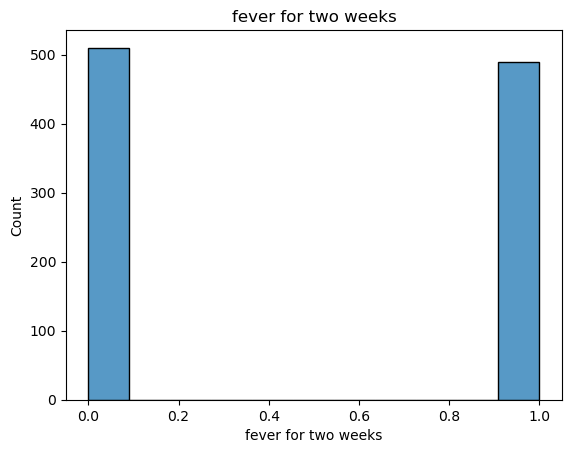

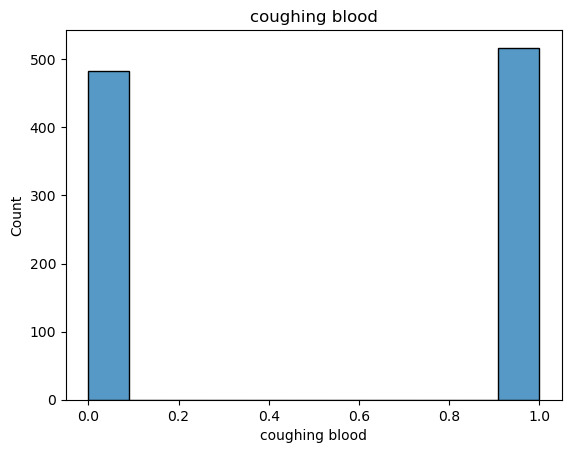

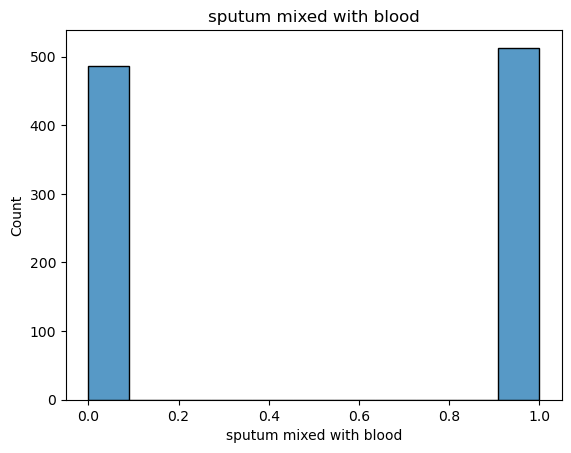

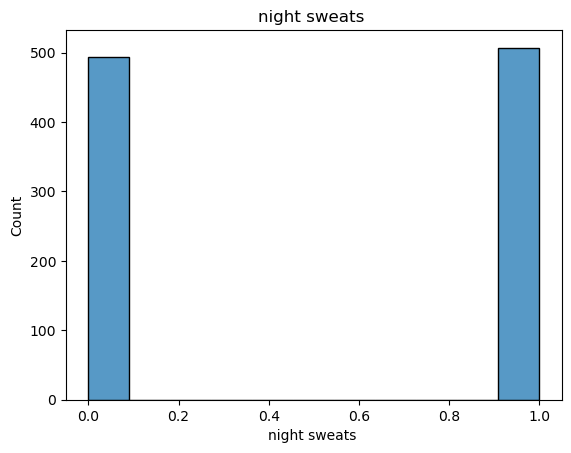

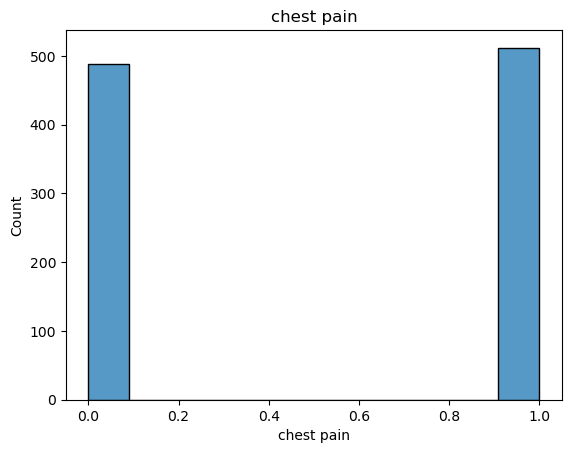

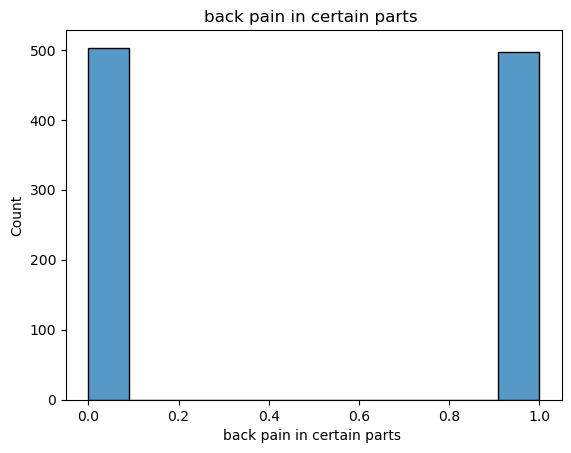

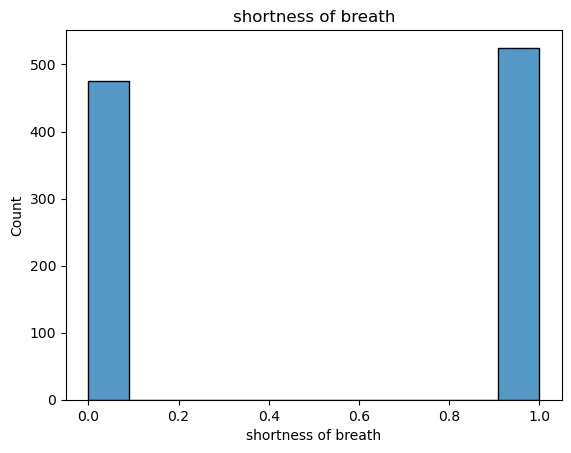

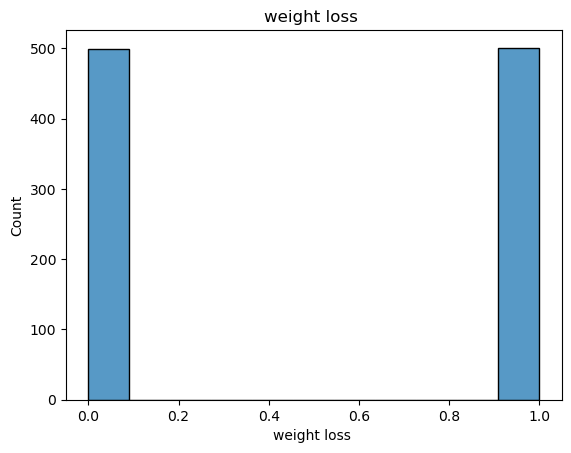

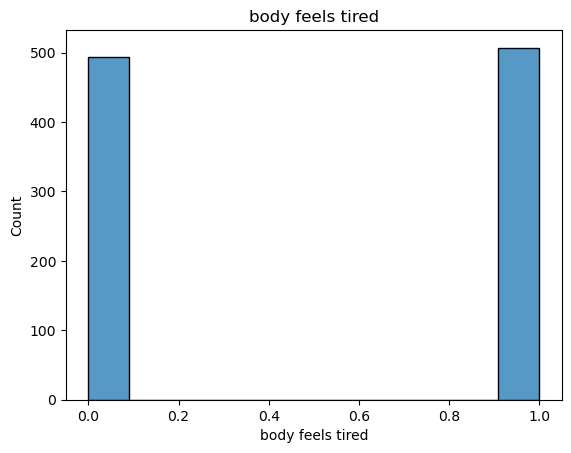

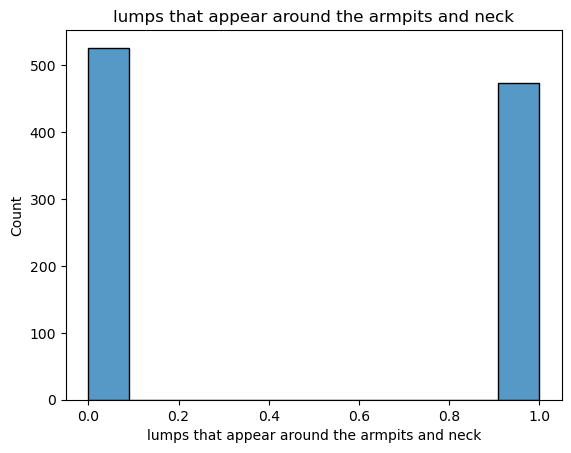

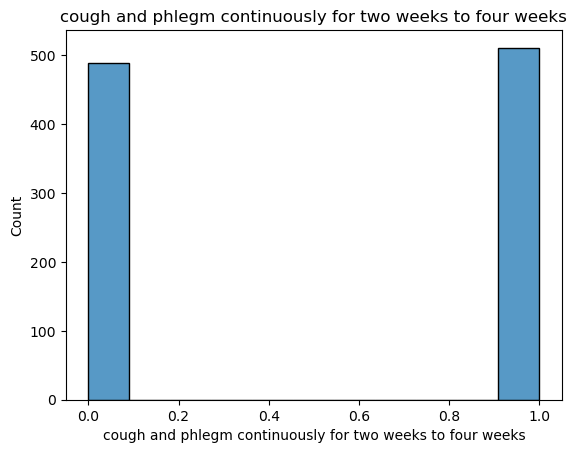

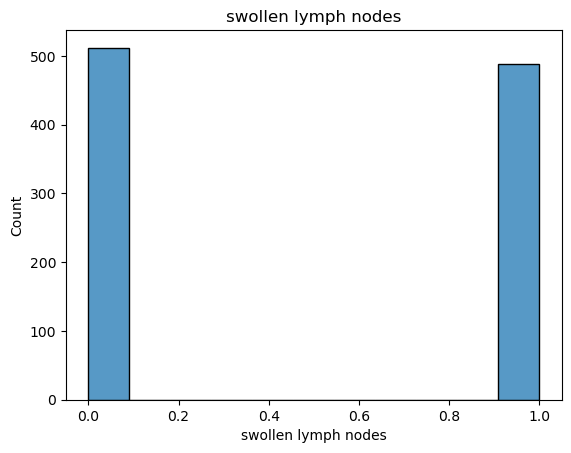

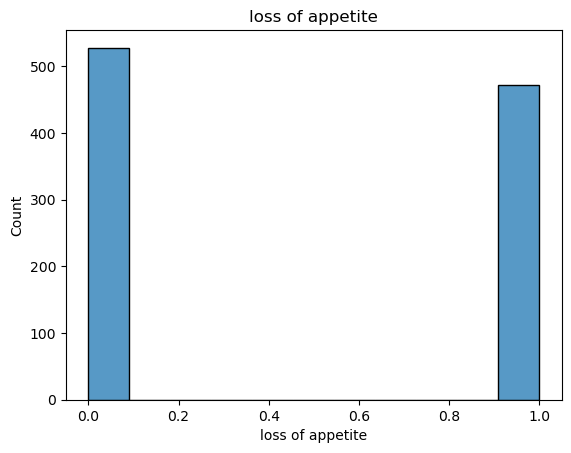

In [35]:
for columnName in df.columns:
    sns.histplot(df[columnName])
    plt.title(columnName)
    plt.show()

<Axes: xlabel='loss of appetite', ylabel='count'>

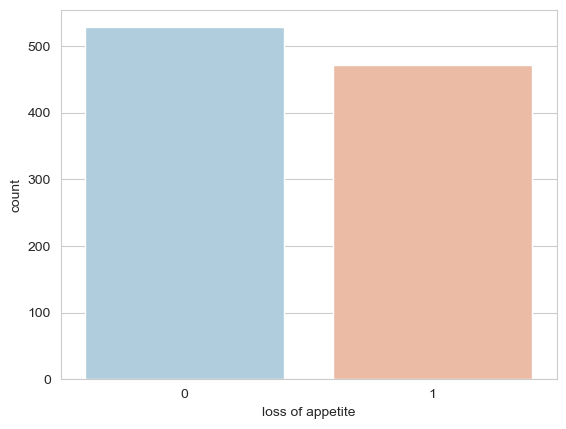

In [37]:
import seaborn as sns 
sns.set_style('whitegrid')
sns.countplot(x='loss of appetite',data=df,palette='RdBu_r')

<Axes: xlabel='chest pain', ylabel='count'>

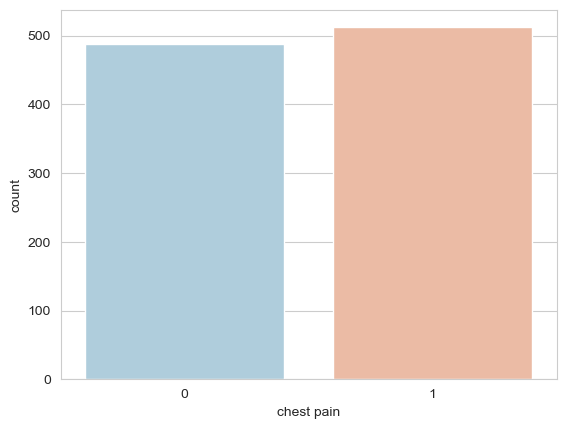

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='chest pain',data=df,palette='RdBu_r')

In [41]:
dataset = pd.get_dummies(df, columns = ['gender', 'fever for two weeks', 
'coughing blood', 'sputum mixed with blood', 'night sweats ', 'chest pain', 
'back pain in certain parts ', 'shortness of breath'])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['no', 'lumps that appear around the armpits and neck', 
'cough and phlegm continuously for two weeks to four weeks','swollen lymph nodes', 'loss of appetite']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [45]:
dataset.head()

,no,name,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite,gender_Female,gender_Male,...,sputum mixed with blood_0,sputum mixed with blood_1,night sweats _0,night sweats _1,chest pain_0,chest pain_1,back pain in certain parts _0,back pain in certain parts _1,shortness of breath_0,shortness of breath_1
0,-1.730320,Carolyn,1,1,1.053425,0.978237,1.024295,-0.945484,True,False,...,True,False,False,True,True,False,True,False,True,False
1,-1.726856,Bari,0,1,-0.949284,-1.022247,1.024295,1.057660,True,False,...,False,True,False,True,False,True,True,False,False,True
2,-1.723391,Edita,0,0,-0.949284,0.978237,-0.976281,1.057660,False,True,...,True,False,False,True,False,True,False,True,False,True
3,-1.719927,Emmery,0,0,1.053425,-1.022247,-0.976281,-0.945484,True,False,...,False,True,True,False,False,True,True,False,True,False
4,-1.716463,Hilly,0,1,-0.949284,-1.022247,1.024295,-0.945484,True,False,...,True,False,False,True,True,False,True,False,False,True


In [47]:
df.dtypes

no                                                            int64
name                                                         object
gender                                                       object
fever for two weeks                                           int64
coughing blood                                                int64
sputum mixed with blood                                       int64
night sweats                                                  int64
chest pain                                                    int64
back pain in certain parts                                    int64
shortness of breath                                           int64
weight loss                                                   int64
body feels tired                                              int64
lumps that appear around the armpits and neck                 int64
cough and phlegm continuously for two weeks to four weeks     int64
swollen lymph nodes                             

In [49]:
dataset[columns_to_scale] = dataset[columns_to_scale].replace('active_tb',np.nan)

In [51]:
from sklearn.preprocessing import LabelEncoder

# Select the columns with string values for encoding
categorical_cols = ['name', 'gender']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Output the encoded dataframe
print(df)

       no  name  gender  fever for two weeks  coughing blood  \
0       1   146       0                    0               0   
1       2    80       0                    1               0   
2       3   251       1                    0               0   
3       4   281       0                    0               0   
4       5   422       0                    0               0   
..    ...   ...     ...                  ...             ...   
995   996   810       0                    1               1   
996   997   777       1                    1               0   
997   998   281       0                    1               0   
998   999   481       1                    1               0   
999  1000   504       0                    0               0   

     sputum mixed with blood  night sweats   chest pain  \
0                          0              1           0   
1                          1              1           1   
2                          0              1           

In [53]:
y = dataset['swollen lymph nodes']
X = dataset.drop(['body feels tired'], axis = 1)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [57]:
print("X_train.shape:{}".format(X_train.shape))
print("y_train.shape:{}".format(y_train.shape))

X_train.shape:(750, 23)
y_train.shape:(750,)


In [61]:
print("X_test.shape:{}".format(X_test.shape))
print("y_test.shape:{}".format(y_test.shape))

X_test.shape:(250, 23)
y_test.shape:(250,)


In [63]:
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,21)

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical target variable
encoded_target = label_encoder.fit_transform(y_train)

# Instantiate the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Reshape the encoded target variable to a 2D array
encoded_target_reshaped = encoded_target.reshape(-1, 1)

# Apply one-hot encoding to the reshaped target variable
onehot_encoded_target = onehot_encoder.fit_transform(encoded_target_reshaped)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train.isnull(), y_train.isnull())

In [69]:
training_accuracy.append(clf.score(X_train.isnull(),y_train.isnull()))
test_accuracy.append(clf.score(X_test.isnull(),y_test.isnull()))

KNN Scores: [0.25, 0.25, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


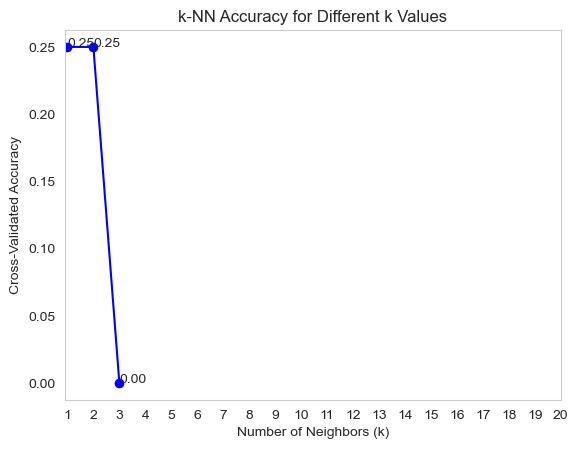

In [111]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
data = {
    'name': ['Edythe', 'Kaitlyn', 'John', 'Doe'],
    'age': [28, 22, 32, 40],
    'target': [1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Split the data
X = df.drop('target', axis=1)
y = df['target']

# One-Hot Encoding for categorical features
onehot_encoder = OneHotEncoder(sparse_output=False)

X_encoded = encoder.fit_transform(X)

# Fit KNN model and collect scores
knn_scores = []
kf = KFold(n_splits=min(5, len(X_encoded)))  # Ensure we don't exceed the number of samples

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    try:
        scores = cross_val_score(knn, X_encoded, y, cv=kf)
        knn_scores.append(scores.mean())
    except ValueError as e:
        print(f"Error with k={k}: {e}")
        knn_scores.append(np.nan)  # Append NaN to maintain the length

# Debugging: Check the scores
print("KNN Scores:", knn_scores)

# Remove NaN and infinite values for plotting
knn_scores_cleaned = [score for score in knn_scores if np.isfinite(score)]
k_values_cleaned = [k for k in range(1, 21) if np.isfinite(knn_scores[k-1])]

# Ensure both lists are of the same length
if len(k_values_cleaned) == len(knn_scores_cleaned):
    # Plotting the results
    plt.plot(k_values_cleaned, knn_scores_cleaned, color='blue', marker='o')
    for i, score in zip(k_values_cleaned, knn_scores_cleaned):
        plt.text(i, score, f"{score:.2f}")  # Display score on the plot
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Cross-Validated Accuracy")
    plt.title("k-NN Accuracy for Different k Values")
    plt.xticks(range(1, 21))  # Set x-ticks
    plt.grid()
    plt.show()
else:
    print("Mismatched lengths between k-values and scores.")
